## AutoGluonImputer

This package offers a sophisticated solution for handling missing data in datasets using the AutoGluon TabularPredictor. It's adept at working with both numerical and categorical data and provides a machine-learning-driven approach for imputation.


In [4]:
#!pip install --upgrade pandas numpy scikit-learn autogluon
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from autogluonImputer import Imputer 
from autogluon.tabular import TabularDataset


#### Step 2: Prepare the Data


In [5]:

# Load the data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

df.dtypes

# convert HouseAge to categorical
# first convert to integer. But we have missing so we use a map
# map
HouseAge=df['HouseAge'].map(lambda x: int(x))
HouseAge
df['HouseAge']=HouseAge
df['HouseAge']
# now convert to categorical
df['HouseAge']=df['HouseAge'].astype('category')
df.dtypes


MedInc         float64
HouseAge      category
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
target         float64
dtype: object

In [6]:
df=TabularDataset(df)
df.dtypes


MedInc         float64
HouseAge      category
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
target         float64
dtype: object

In [7]:

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Introduce missingness
train_missing = train.mask(np.random.random(train.shape) < 0.2)
test_missing = test.mask(np.random.random(test.shape) < 0.2)


## Step 3: Impute Missing Values

In [8]:
imputer = Imputer(num_iter=2, time_limit=10)
train_imputed = imputer.fit(train_missing)
test_imputed = imputer.transform(test_missing)

No path specified. Models will be saved in: "AutogluonModels/ag-20231029_194907/"


Fitting the imputer to the data...


No path specified. Models will be saved in: "AutogluonModels/ag-20231029_194919/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_194931/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_194942/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_194955/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195006/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195016/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195029/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195041/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195052/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195103/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195115/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195127/"
No path specifie

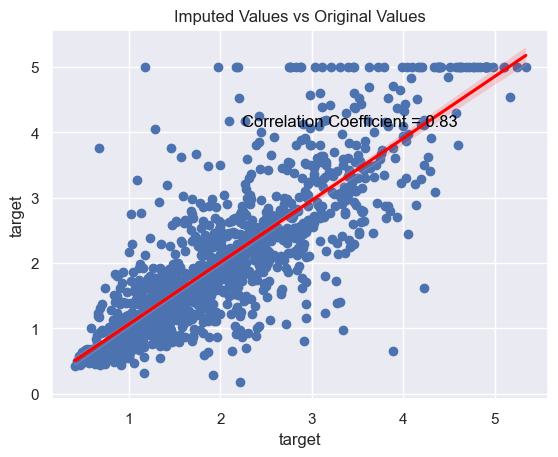

In [9]:
# Compare imputed values with original values for the target variable
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Identify missing indices in test dataset
missing_indices_test = test_missing['target'].index[test_missing['target'].apply(np.isnan)]

# Plot imputed values against original values
plt.scatter(test_imputed['target'][missing_indices_test], test['target'][missing_indices_test])
plt.xlabel('Imputed Values')
plt.ylabel('Original Values')
plt.title('Imputed Values vs Original Values')
sns.regplot(x=test_imputed['target'][missing_indices_test], y=test['target'][missing_indices_test], scatter=False, color='red')
# Calculate and display the correlation coefficient
corr = np.corrcoef(test_imputed['target'][missing_indices_test], test['target'][missing_indices_test])[0,1]
plt.text(.6, .75, f'Correlation Coefficient = {round(corr, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='black')
plt.show()

# multiple imputation

In [10]:
from autogluonImputer import multiple_imputation
num_iter=2
time_limit=10
train_imputed = multiple_imputation(train_missing, n_imputations=10, num_iter=num_iter, time_limit=time_limit, fitonce=True)


No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195248/"


Fitting the model once and imputing multiple times...
Fitting the imputer to the data...


No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195301/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195312/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195325/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195336/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195349/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195402/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195413/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195425/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195437/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195448/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195500/"
No path specified. Models will be saved in: "AutogluonModels/ag-20231029_195511/"
No path specifie

Performing imputation 1/10
Performing imputation 2/10
Performing imputation 3/10
Performing imputation 4/10
Performing imputation 5/10
Performing imputation 6/10
Performing imputation 7/10
Performing imputation 8/10
Performing imputation 9/10
Performing imputation 10/10


In [11]:
train_imputed[0].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
7061,4.131200,35,5.882353,0.975490,1218.0,2.985294,33.986492,-118.02,1.938000
14689,2.863100,20,4.401210,1.076613,999.0,2.014113,32.744396,-117.09,1.697000
17323,4.724113,24,5.617544,1.015060,731.0,2.564912,34.967377,-120.14,2.598000
10056,3.109400,14,5.722188,1.094203,302.0,2.188406,39.260000,-121.00,1.521008
15750,4.229400,52,4.801205,1.066265,1526.0,2.298193,37.770000,-122.45,5.000010


In [12]:
train_imputed[1].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
7061,4.131200,35,5.882353,0.975490,1218.0,2.985294,33.986492,-118.02,1.938000
14689,2.863100,20,4.401210,1.076613,999.0,2.014113,32.744396,-117.09,1.697000
17323,4.740625,24,5.617544,1.020704,731.0,2.564912,34.971989,-120.14,2.598000
10056,3.109400,14,5.721765,1.094203,302.0,2.188406,39.260000,-121.00,1.521008
15750,4.229400,52,4.801205,1.066265,1526.0,2.298193,37.770000,-122.45,5.000010


In [13]:
train_imputed[1].dtypes

MedInc         float64
HouseAge      category
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
target         float64
dtype: object

In [14]:
imputer.evaluate_imputation(train, percentage=.2, ntimes=10)


SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy